In [48]:
import pandas as pd
import numpy as np
import datetime
import time
import seaborn as sns
import data.collected_data.methods.get_listing_median_price as gt
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (15, 10)},
        style="whitegrid", font_scale= 0.8)


In [49]:
path_to_csv = '/Users/eaxes/DA Projects/CMC/data/collected_data/mined/price_token_test.csv'
df = pd.read_csv(path_to_csv, index_col=0)
df = df.query('for_charts == True')
df


,name,ticker,platform_raise,coingecko_id,coingecko_numerical_id,sho_price,median_listing_sell_price,ath_median_listing,for_charts
0,Gamium,GMM,200000,gamium,22749,0.0003,0.0020978153826027,6.9927179420089995,True
2,AdaSwap,ASW,195000,adaswap,24453,0.005,0.0355824699101078,7.11649398202156,True
3,Step.app,FITFI,2750000,step-app-fitfi,25015,0.0049,0.1878854602035458,38.34397147011139,True
4,DragonSB,SB,195000,dragonsb,23738,0.15,0.3267951753518027,2.1786345023453513,True
5,DeFiato,DFIAT,600000,defiato,13386,0.08,0.1197949601008165,1.4974370012602063,True
...,...,...,...,...,...,...,...,...,...
92,DAO Maker,DAO,3900000,dao-maker,13915,0.1,2.873655040212752,28.73655040212752,True
93,AnRKey X™,ANRX,125000,anrkey-x,13415,0.025,0.0807808414286971,3.2312336571478837,True
94,PlotX,No ticket found through transform function,250000,plotx,12795,0.05,0.1350403374578565,2.70080674915713,True
95,DeFiner,No ticket found through transform function,96000,definer,12780,0.6,1.1935061783750534,1.9891769639584223,True


/Users/eaxes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ath_median_listing', ylabel='Density'>

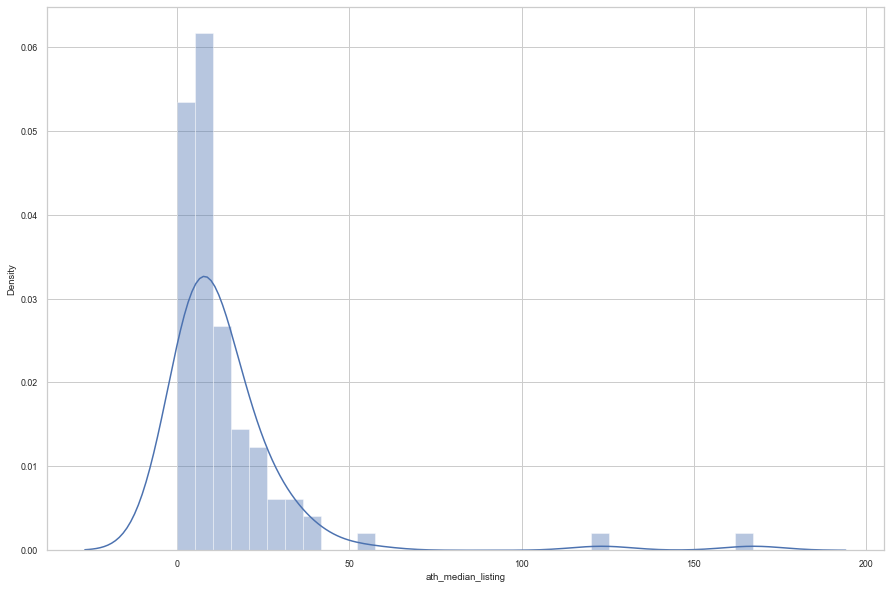

In [51]:
sns.distplot(df.ath_median_listing)

In [52]:
df.ath_median_listing.apply()

count                     93
unique                    93
top       6.9927179420089995
freq                       1
Name: ath_median_listing, dtype: object

In [53]:
df = df.astype({"ath_median_listing": "Float64"})

TypeError: object cannot be converted to a FloatingDtype